In [4]:
#Import all necessary modules and packages to perform kmeans

#For creating dataframes and handling arrays
import pandas as pd #enables use of pandas libraries with alias pd
import numpy as np #enables use of numpy libraries with alias np
import string

#For removing stopwords
from nltk.corpus import stopwords

#For word embedding using frequency/counts method
from sklearn.feature_extraction.text import CountVectorizer

#For izing data in preparation for principal component analysis and performing PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#For LSA 
from sklearn.decomposition import TruncatedSVD

#For plotting
import matplotlib.pyplot as plt

#For performing kMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#from word embedding using frquency counts methods
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [6]:
# Load dataset
file_path = 'data/PeerSupport_Level3.xlsx'
data = pd.read_excel(file_path)
pd.reset_option('display.max_colwidth')


#regular
dataset = pd.DataFrame()
dataset.loc[:, 'PeerSupportResponse'] = data['PeerSupportResponse'].astype(str)
print(dataset)


                                    PeerSupportResponse
0                                           Communicate
1                                            Good to Go
2                                                   nan
3                                                   nan
4     Not wast etime by going around in circles with...
...                                                 ...
1756  Ask more questions clarifying the topics first...
1757  Students in my class being supportive of each ...
1758                                Ask good questions.
1759                                                nan
1760                                                  0

[1761 rows x 1 columns]


In [ ]:
#Preprocess dataset by converting all text to lower case

# Convert all text to lower case
#=======INITIALIZE LOWER CASE=======

dataset.loc[:, 'LowerCase'] = dataset['Document'].str.lower()




#eleminate don't => do not
print(type(dataset))

import contractions
def eliminate_noise(data):
  #converting to str
  data = str(data)
  # Step 0.5: maunual fixes
  data = data.replace(" ta ", " teachingassistant ")
  data = data.replace(" tas ", " teachingassistant ")
  data = data.replace(" oh ", " officehours ")
  data = data.replace("oh ", " officehours ")
  data = data.replace(" oh", " officehours ")
  data = data.replace(" office hours ", " officehours ")
  data = data.replace("office hours ", " officehours ")
  data = data.replace(" office hours", " officehours ")
  data = data.replace(" office hour ", " officehours ")
  data = data.replace("office hour ", " officehours ")
  data = data.replace(" office hour", " officehours ")
  data = data.replace("student", "")
  data = data.replace("class", "")
  data = data.replace("question", "")
  

  # Step 1: expand contractions
  data = contractions.fix(data)
  # Step 2: eliminate special characters
  kept_chars = []
  for char in data:
    if char.isalnum() or char.isspace(): # if character is alphanumeric or a space
      kept_chars.append(char)
  data = "".join(kept_chars) # Add all kept characters back into data line
  return data
#=======INITIALIZE CONTRACTIONS=======
dataset.loc[:, 'NoContractions'] = dataset['LowerCase'].apply(eliminate_noise)

print(dataset)


<class 'pandas.core.frame.DataFrame'>
                                               Document  \
0     Variety of office hours so that all can get he...   
1                                    Respond to e-mails   
2                                              examples   
3              Let students work in groups on questions   
4     Use case specific exampls that are useful to e...   
5                    Provide summary and study material   
6     Continue doing practice problems; Discuss labs...   
7     Go through the hard problem from homework and ...   
8                                         More problems   
9     Go over material that is covered in class and ...   
10          Go over areas of difficulty in the material   
11    Marcos; He is very understandable and works wi...   
12    Be on the same side as the student; be in our ...   
13                          Practice problems are great   
14    Involve all students to make sure they are all...   
15                

In [212]:
# Install wordcloud if not already installed
#%pip install wordcloud

#remove stop words
from wordcloud import WordCloud, STOPWORDS
import string
import pandas as pd


CUSTOM_STOPWORDS = set(STOPWORDS) - {"not"}

# Define normalization function
def normalize(text):
    # Step 1: Lowercase
    text = str(text).lower()
    
    # Step 2: Remove punctuation
    text = "".join(char if char not in string.punctuation else " " for char in text)
    
    # Step 3: Remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in CUSTOM_STOPWORDS]
    
    return " ".join(filtered_words)

#=======INITIALIZE REMOVE STOP WORDS=======

dataset.loc[:, 'NoStopWords'] = dataset['NoContractions'].apply(normalize)
engagmentDataset.loc[:, 'NoStopWords'] = engagmentDataset['NoContractions'].apply(normalize)
examplesDataset.loc[:, 'NoStopWords'] = examplesDataset['NoContractions'].apply(normalize)
planningDataset.loc[:, 'NoStopWords'] = planningDataset['NoContractions'].apply(normalize)


print(dataset.head())

                                            Document  \
0  Variety of office hours so that all can get he...   
1                                 Respond to e-mails   
2                                           examples   
3           Let students work in groups on questions   
4  Use case specific exampls that are useful to e...   

                                           LowerCase  \
0  variety of office hours so that all can get he...   
1                                 respond to e-mails   
2                                           examples   
3           let students work in groups on questions   
4  use case specific exampls that are useful to e...   

                                      NoContractions  \
0  variety of officehours so that all can get hel...   
1                                  respond to emails   
2                                           examples   
3                          let s work in groups on s   
4  use case specific exampls that are useful t

In [213]:
#Remove punctuation from dataset

def remove_punctuation(text):
    """Removes punctuation from a string."""
    return ''.join([char for char in text if char not in string.punctuation])


#=======INITIALIZE REMOVE PUNCTUATION=======
dataset['RemovePunctuation'] = dataset['NoStopWords'].apply(remove_punctuation)
engagmentDataset.loc[:, 'RemovePunctuation'] = engagmentDataset['NoStopWords'].apply(remove_punctuation)
examplesDataset.loc[:, 'RemovePunctuation'] = examplesDataset['NoStopWords'].apply(remove_punctuation)
planningDataset.loc[:, 'RemovePunctuation'] = planningDataset['NoStopWords'].apply(remove_punctuation)

print (engagmentDataset)

                                               Document  \
0     Variety of office hours so that all can get he...   
1                                    Respond to e-mails   
3              Let students work in groups on questions   
12    Be on the same side as the student; be in our ...   
14    Involve all students to make sure they are all...   
16    preliminary checks on assignments before being...   
17    TA should correct more grammatical errors for ...   
23    * Provide guidance on how assignments will be ...   
24    Be open to communication and accessible, espec...   
28    Being available for questions in an out of cla...   
34    An action that TAs can do to support me in my ...   
36    Work one-on-one with students, going over prev...   
38              Be interested in the students learning.   
39    When I meet some difficulties according to the...   
41    TAs are best when they make themselves availab...   
42    Be available for questions regarding class mat... 

In [214]:
import spacy
nlp = spacy.load("en_core_web_sm")  # Load spaCy’s English model

# lemmatization function
def lemm_data(data):
    doc = nlp(str(data))
    return " ".join([token.lemma_.lower() for token in doc if token.is_alpha])

#=======INITIALIZE LEMMATIZATION=======
dataset['lemmatized_data'] = dataset['RemovePunctuation'].apply(lemm_data)
engagmentDataset.loc[:, 'lemmatized_data'] = engagmentDataset['RemovePunctuation'].apply(lemm_data)
examplesDataset.loc[:, 'lemmatized_data'] = examplesDataset['RemovePunctuation'].apply(lemm_data)
planningDataset.loc[:, 'lemmatized_data'] = planningDataset['RemovePunctuation'].apply(lemm_data)
#print (dataset)
print(engagmentDataset.head())
print(examplesDataset.head())
print(planningDataset.head())



                                             Document  \
0   Variety of office hours so that all can get he...   
1                                  Respond to e-mails   
3            Let students work in groups on questions   
12  Be on the same side as the student; be in our ...   
14  Involve all students to make sure they are all...   

                                            LowerCase  \
0   variety of office hours so that all can get he...   
1                                  respond to e-mails   
3            let students work in groups on questions   
12  be on the same side as the student; be in our ...   
14  involve all students to make sure they are all...   

                                       NoContractions  \
0   variety of officehours so that all can get hel...   
1                                   respond to emails   
3                           let s work in groups on s   
12  be on the same side as the  be in our shoes as...   
14  involve all s to make sur

In [215]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load your dataset
file_path = 'TASupport_Level2_All.xlsx'
data = pd.read_excel(file_path)

# Ensure text column is string type
dataset['DomainExpert_Topic'] = data['DomainExpert_Topic'].astype(str)

# Map topics to numeric labels
topic_mapping = {
    'Engagement': 0,
    'Examples': 1,
    'Planning': 2
}
dataset['Topic_ID'] = dataset['DomainExpert_Topic'].map(topic_mapping)

# Encode labels (optional)
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(dataset['DomainExpert_Topic'])

# ===== CountVectorizer with bigrams =====
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english', ngram_range=(1,2))
count_matrix = count_vect.fit_transform(dataset['lemmatized_data'])

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english', ngram_range=(1,2))
tfidf_matrix = tfidf_vect.fit_transform(dataset['lemmatized_data'])


usedMatrix = tfidf_matrix



# ===== LSA (TruncatedSVD) =====
n_topics = 3
lsa = TruncatedSVD(n_components=n_topics, random_state=40)
lsa_matrix = lsa.fit_transform(usedMatrix)  # document-topic matrix

# Assign each document to topic with highest weight
pred_labels = np.argmax(lsa_matrix, axis=1)

# ===== Classification report =====
report = classification_report(dataset['Topic_ID'], pred_labels, target_names=list(topic_mapping.keys()))
print(report)

# ===== Calculate per-topic accuracy =====
per_topic_accuracy = {}
for topic_name, topic_id in topic_mapping.items():
    tp = np.sum((dataset['Topic_ID'] == topic_id) & (pred_labels == topic_id))
    total = np.sum(dataset['Topic_ID'] == topic_id)
    per_topic_accuracy[topic_name] = tp / total

print("Per-topic accuracy:")
for topic, acc in per_topic_accuracy.items():
    print(f"{topic}: {acc:.2f}")

# ===== Identify TP and FN documents with row numbers =====
tp_docs = {}
fn_docs = {}

for topic_name, topic_id in topic_mapping.items():
    tp_idx = np.where((dataset['Topic_ID'] == topic_id) & (pred_labels == topic_id))[0]
    fn_idx = np.where((dataset['Topic_ID'] == topic_id) & (pred_labels != topic_id))[0]
    
    tp_docs[topic_name] = [(dataset.index[i], dataset.iloc[i]['lemmatized_data']) for i in tp_idx[:2]]
    fn_docs[topic_name] = [(dataset.index[i], dataset.iloc[i]['lemmatized_data']) for i in fn_idx[:2]]

# ===== Tabulate results including row numbers =====
results = []
for topic in topic_mapping.keys():
    results.append({
        'Topic ID': topic_mapping[topic],
        'Topic Label': topic,
        'TP Row 1': tp_docs[topic][0][0] if len(tp_docs[topic]) > 0 else "",
        'TP Doc 1': tp_docs[topic][0][1] if len(tp_docs[topic]) > 0 else "",
        'TP Row 2': tp_docs[topic][1][0] if len(tp_docs[topic]) > 1 else "",
        'TP Doc 2': tp_docs[topic][1][1] if len(tp_docs[topic]) > 1 else "",
        'FN Row 1': fn_docs[topic][0][0] if len(fn_docs[topic]) > 0 else "",
        'FN Doc 1': fn_docs[topic][0][1] if len(fn_docs[topic]) > 0 else "",
        'FN Row 2': fn_docs[topic][1][0] if len(fn_docs[topic]) > 1 else "",
        'FN Doc 2': fn_docs[topic][1][1] if len(fn_docs[topic]) > 1 else "",
        'Per-topic Accuracy': per_topic_accuracy[topic]
    })

results_df = pd.DataFrame(results)
print(results_df)


# Export to Excel
output_file = 'LSA_Topic_Results.xlsx'
results_df.to_excel(output_file, index=False)
print(f"Results exported to {output_file}")

print(dataset)


              precision    recall  f1-score   support

  Engagement       0.57      0.97      0.72       811
    Examples       0.00      0.00      0.00       134
    Planning       0.39      0.13      0.19       647

    accuracy                           0.55      1592
   macro avg       0.32      0.37      0.30      1592
weighted avg       0.45      0.55      0.44      1592

Per-topic accuracy:
Engagement: 0.97
Examples: 0.00
Planning: 0.13
   Topic ID Topic Label TP Row 1  \
0         0  Engagement        0   
1         1    Examples            
2         2    Planning       54   

                                            TP Doc 1 TP Row 2  \
0                       variety officehour help need        1   
1                                                               
2  organize use time plenty example strategy use ...       63   

                                            TP Doc 2  FN Row 1  \
0                                      respond email         3   
1             

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

Note: you may need to restart the kernel to use updated packages.


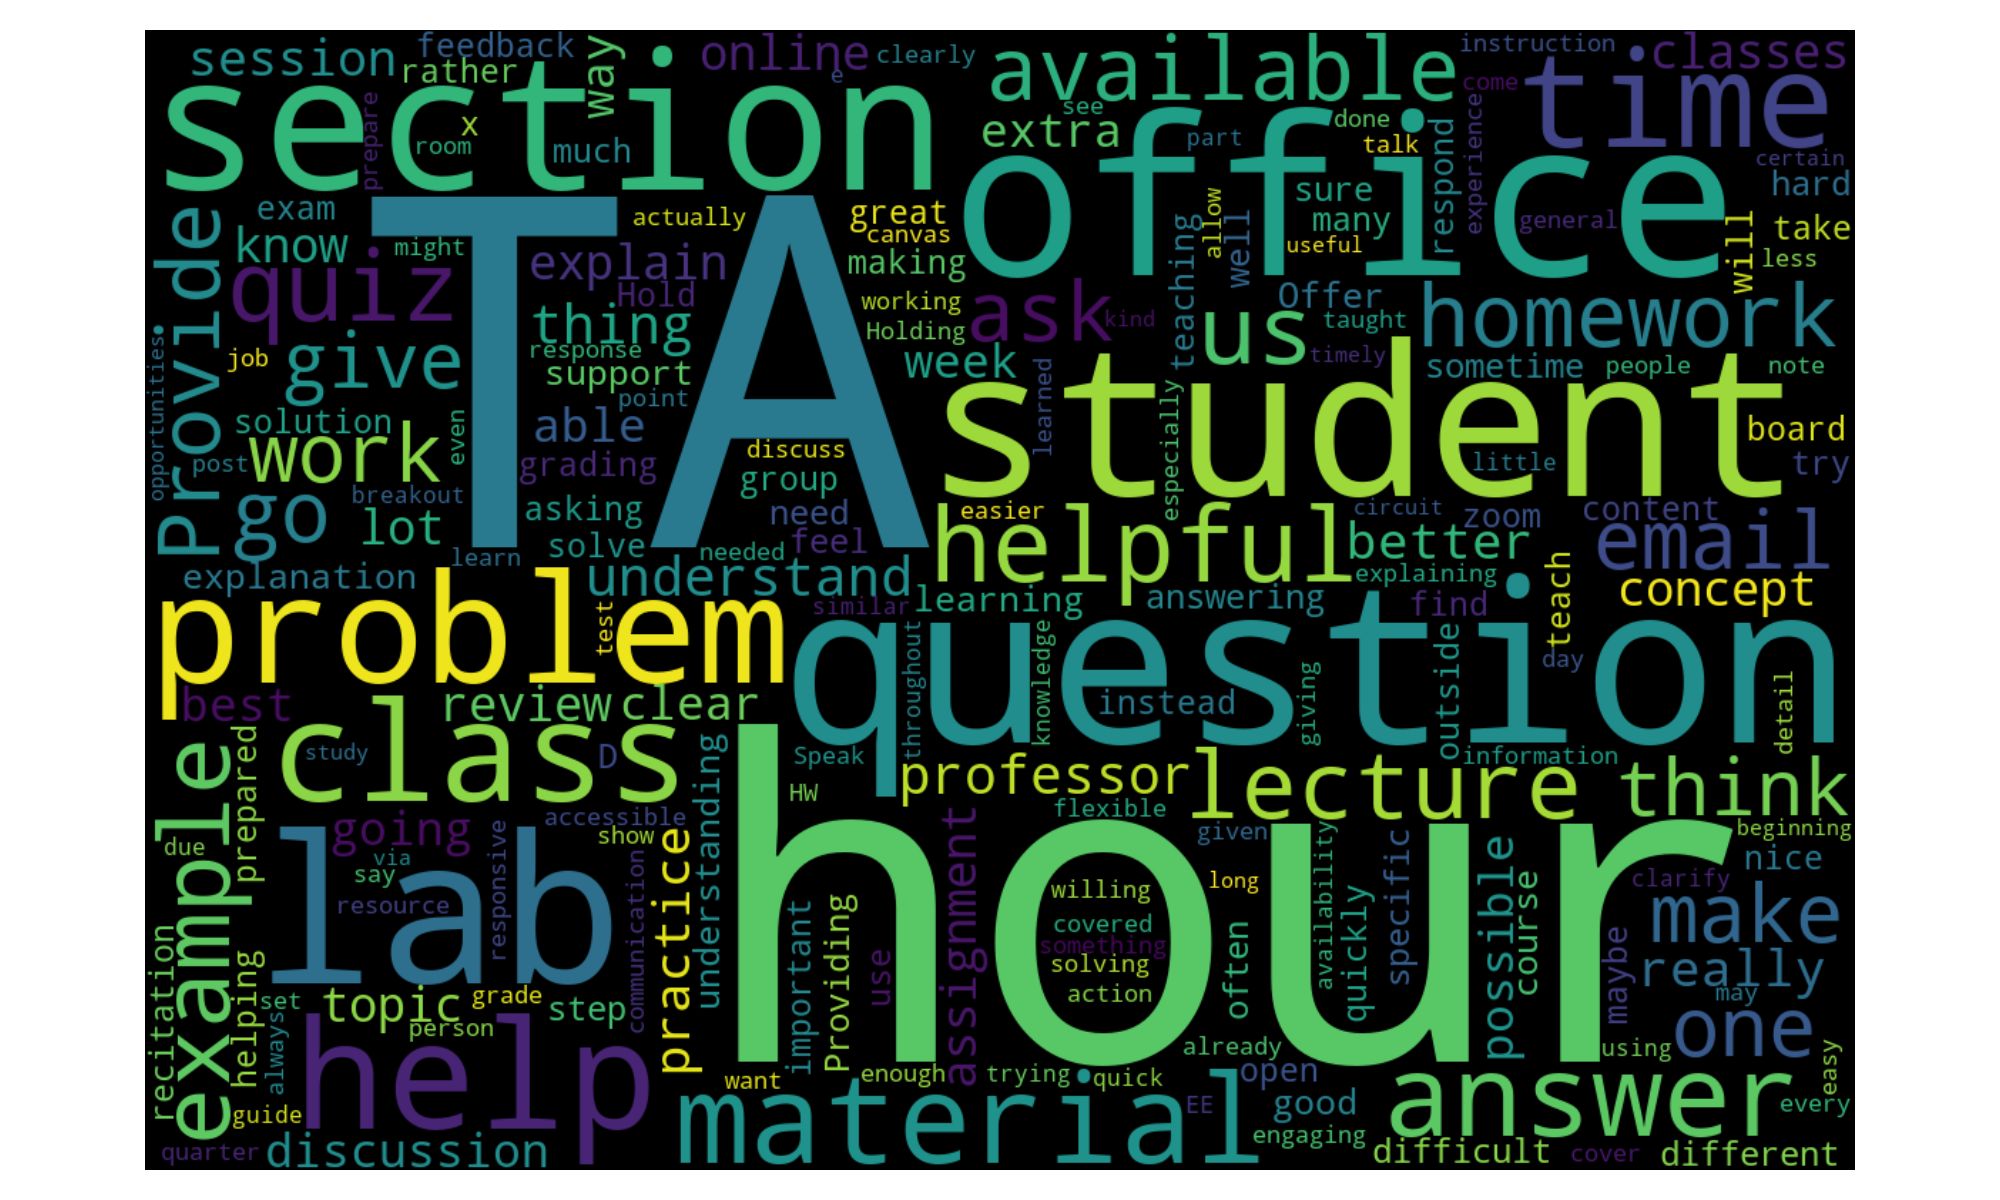

In [216]:
#========GENERATE WORD CLOUD===========
#Use Load Data sample code to load data from Excel file as 
#dataframe requres dataframe called 'data' with column label 'raw_data'
#stores word cloud in file called 1_rawd_WC.png
#adjust as necessary to suit the task at hand

%pip install wordcloud matplotlib
# ^Installs necessary libraries to current kernel (not device)

# Imports
from wordcloud import WordCloud, STOPWORDS # Wordcloud builder + Stopwords
import matplotlib.pyplot as plt # Visual rendering
from IPython.display import Image # Display image in Jupyter

# Wordcloud function
def gen_wordcloud(data, output):
   
    # Step 1: convert everything to string and drop blanks
    text_list = data.dropna().astype(str).tolist()
    # dropna -> removes NAN , astype(str) -> converts o string , tolist() -> convert panda set to list
    
    # Step 2: join into one big string
    combined = " ".join(text_list)

    # This step (including the "regexp" below) is only included to fix visuals to include contractions
    combined = combined.replace("’", "'").replace("‘", "'")
    
    wc = WordCloud(width=1200, height=800, stopwords=STOPWORDS, collocations=False, regexp=r"[A-Za-z']+") # Initialize empty wordcloud
    wc.generate(combined) # Populate wordcloud with "combined" data
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(output, dpi=200)
    plt.close()
    
# Calling gen_wordcloud


gen_wordcloud(dataset['lemmatized_data'], "dataset_afterProccessing.png") # Saves to directory
gen_wordcloud(dataset['Document'], "dataset_beforeProccessing.png") # Saves to directory

gen_wordcloud(engagmentDataset['lemmatized_data'], "engagmentDataset_afterProccessing.png") # Saves to directory
gen_wordcloud(engagmentDataset['Document'], "engagmentDataset_beforeProccessing.png") # Saves to directory

gen_wordcloud(examplesDataset['lemmatized_data'], "examplesDataset_afterProccessing.png") # Saves to directory
gen_wordcloud(examplesDataset['Document'], "examplesDataset_beforeProccessing.png") # Saves to directory

gen_wordcloud(planningDataset['lemmatized_data'], "planningDataset_afterProccessing.png") # Saves to directory
gen_wordcloud(planningDataset['Document'], "planningDataset_beforeProccessing.png") # Saves to directory

Image("dataset_afterProccessing.png") # Displays image in your environment
Image("dataset_beforeProccessing.png") # Displays image in your environment


In [217]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Function to run TF-IDF + LSA + coherence (topics = 2,3,4,5)
def lsa_and_coherence(dataset, n_topics_list=[2,3,4,5], n_words=10):
    results = []
    
    # Step 1: TF-IDF
    tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
    tfidf_matrix = tfidf_vect.fit_transform(dataset['lemmatized_data'])
    feature_names = tfidf_vect.get_feature_names_out()
    
    # Step 2: Tokenize corpus for gensim coherence
    tokenized_corpus = [doc.split() for doc in dataset['lemmatized_data']]
    dictionary = Dictionary(tokenized_corpus)
    corpus_bow = [dictionary.doc2bow(text) for text in tokenized_corpus]
    
    # Step 3: Loop over topics
    for n_topics in n_topics_list:
        
        # LSA model
        lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
        topic_matrix = lsa_model.fit_transform(tfidf_matrix)
        
        # Extract top words per topic
        topics_words = []
        for topic_idx, topic in enumerate(lsa_model.components_):
            top_features = [feature_names[i] for i in topic.argsort()[::-1][:n_words]]
            topics_words.append(top_features)
        
        # Compute UMass coherence
        cm = CoherenceModel(
            topics=topics_words,
            corpus=corpus_bow,
            dictionary=dictionary,
            coherence='u_mass'
        )
        
        topic_coherences = cm.get_coherence_per_topic()
        avg_coherence = sum(topic_coherences) / len(topic_coherences)
        
        # Prepare row dict
        row = {
            'Num_Topics': n_topics,
            'Avg_UMass_Coherence': avg_coherence
        }
        
        # Add per-topic coherence
        for i, score in enumerate(topic_coherences):
            row[f'Topic_{i+1}_Coherence'] = score
        
        results.append(row)
    
    return pd.DataFrame(results)



# === RUN ON ALL 4 DATASETS ===
dataset_results      = lsa_and_coherence(dataset)
engagement_results   = lsa_and_coherence(engagmentDataset)
examples_results     = lsa_and_coherence(examplesDataset)
planning_results     = lsa_and_coherence(planningDataset)

# === PRINT ALL RESULTS ===
print("===== DATASET RESULTS =====")
print(dataset_results, "\n")

print("===== ENGAGEMENT RESULTS =====")
print(engagement_results, "\n")

print("===== EXAMPLES RESULTS =====")
print(examples_results, "\n")

print("===== PLANNING RESULTS =====")
print(planning_results, "\n")


===== DATASET RESULTS =====
   Num_Topics  Avg_UMass_Coherence  Topic_1_Coherence  Topic_2_Coherence  \
0           2            -7.936803          -2.128324         -13.745282   
1           3            -6.017630          -2.128324         -13.745282   
2           4            -5.990613          -2.128324         -13.745282   
3           5            -5.360173          -2.128324         -13.745282   

   Topic_3_Coherence  Topic_4_Coherence  Topic_5_Coherence  
0                NaN                NaN                NaN  
1          -2.179282                NaN                NaN  
2          -2.166801          -5.922045                NaN  
3          -2.179282          -5.882867           -2.86511   

===== ENGAGEMENT RESULTS =====
   Num_Topics  Avg_UMass_Coherence  Topic_1_Coherence  Topic_2_Coherence  \
0           2            -9.862216            -2.8298         -16.894632   
1           3            -8.931038            -2.8298         -16.894632   
2           4            

In [218]:
print(dataset.shape)
print(engagmentDataset.shape)
print(examplesDataset.shape)
print(planningDataset.shape)


(1592, 8)
(811, 6)
(134, 6)
(647, 6)


In [219]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Function to run CountVectorizer + LSA + coherence (per-topic + average)
def lsa_and_coherence_count(dataset, n_topics_list=[2,3,4,5], n_words=10):
    results = []
    
    # Step 1: Count Vectorizer
    count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
    count_matrix = count_vect.fit_transform(dataset['lemmatized_data'])
    feature_names = count_vect.get_feature_names_out()
    
    # Step 2: Tokenize corpus for gensim coherence
    tokenized_corpus = [doc.split() for doc in dataset['lemmatized_data']]
    dictionary = Dictionary(tokenized_corpus)
    corpus_bow = [dictionary.doc2bow(text) for text in tokenized_corpus]
    
    # Step 3: Loop over topic numbers
    for n_topics in n_topics_list:
        # LSA
        lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
        topic_matrix = lsa_model.fit_transform(count_matrix)
        
        # Extract top words per topic
        topics_words = []
        for topic_idx, topic in enumerate(lsa_model.components_):
            top_features = [feature_names[i] for i in topic.argsort()[::-1][:n_words]]
            topics_words.append(top_features)
        
        # Compute UMass coherence
        cm = CoherenceModel(
            topics=topics_words,
            corpus=corpus_bow,
            dictionary=dictionary,
            coherence='u_mass'
        )
        topic_coherences = cm.get_coherence_per_topic()  # list of coherence per topic
        avg_coherence = sum(topic_coherences) / len(topic_coherences)
        
        # Build dictionary for this model
        row = {'Num_Topics': n_topics, 'Avg_UMass_Coherence': avg_coherence}
        # Add per-topic coherence columns dynamically
        for i, score in enumerate(topic_coherences):
            row[f'Topic_{i+1}_Coherence'] = score
        results.append(row)
    
    return pd.DataFrame(results)

# Example usage for your four datasets
dataset_results_count = lsa_and_coherence_count(dataset)
engagment_results_count = lsa_and_coherence_count(engagmentDataset)
examples_results_count = lsa_and_coherence_count(examplesDataset)
planning_results_count = lsa_and_coherence_count(planningDataset)

# Display results
print(dataset_results_count)
print(engagment_results_count)
print(examples_results_count)
print(planning_results_count)


   Num_Topics  Avg_UMass_Coherence  Topic_1_Coherence  Topic_2_Coherence  \
0           2            -2.348069          -1.999785          -2.696354   
1           3            -3.556712          -1.999785          -2.696354   
2           4            -3.547255          -1.999785          -2.696354   
3           5            -3.975883          -1.999785          -2.696354   

   Topic_3_Coherence  Topic_4_Coherence  Topic_5_Coherence  
0                NaN                NaN                NaN  
1          -5.973996                NaN                NaN  
2          -5.973996          -3.518884                NaN  
3          -5.973996          -3.518884          -5.690395  
   Num_Topics  Avg_UMass_Coherence  Topic_1_Coherence  Topic_2_Coherence  \
0           2            -6.514483          -1.927748         -11.101217   
1           3            -5.867021          -1.927748         -11.101217   
2           4            -5.097176          -1.927748         -11.101217   
3         

1 topics: 0.0478 explained variance
2 topics: 0.0852 explained variance
3 topics: 0.1207 explained variance
4 topics: 0.1482 explained variance
5 topics: 0.1750 explained variance
6 topics: 0.1989 explained variance
7 topics: 0.2186 explained variance
8 topics: 0.2368 explained variance
9 topics: 0.2548 explained variance
10 topics: 0.2712 explained variance


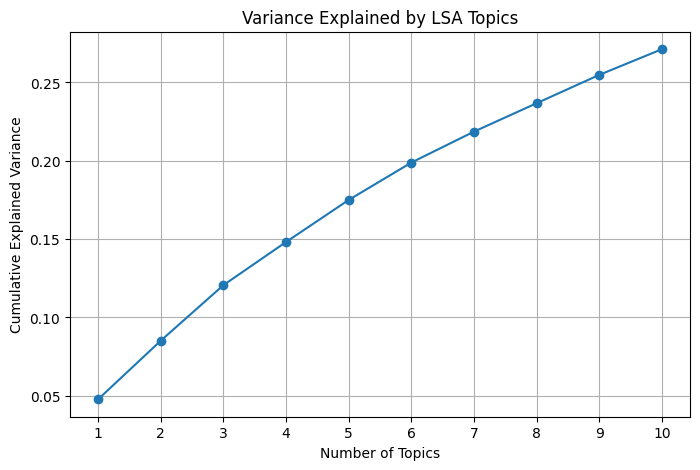

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD



count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
count_matrix = count_vect.fit_transform(dataset['lemmatized_data'])
feature_names = count_vect.get_feature_names_out()

max_topics = 10
explained_variances = []

for n_topics in range(1, max_topics+1):
    lsa = TruncatedSVD(n_components=n_topics, random_state=42)
    lsa.fit(count_matrix)
    explained_variances.append(np.sum(lsa.explained_variance_ratio_))

# Print the explained variance
for i, var in enumerate(explained_variances, 1):
    print(f"{i} topics: {var:.4f} explained variance")
plt.figure(figsize=(8,5))
plt.plot(range(1, max_topics+1), explained_variances, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by LSA Topics")
plt.xticks(range(1, max_topics+1))
plt.grid(True)
plt.show()


In [221]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_topic_wordclouds(topics_words, model_name, n_topics):
    """
    Generates wordclouds for each topic in a model.
    
    topics_words: list of lists of top words per topic
    model_name: string to include in output filenames
    n_topics: number of topics in this model
    """
    for idx, words in enumerate(topics_words):
        text = " ".join(words)
        wc = WordCloud(width=800, height=600, stopwords=STOPWORDS, collocations=False).generate(text)
        plt.figure(figsize=(8,6))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{model_name} - Topic {idx+1} ({n_topics} topics)")
        output_file = f"{model_name}_topic{idx+1}_{n_topics}topics.png"
        plt.savefig(output_file, dpi=200)
        plt.close()

def lsa_and_wordclouds(dataset, model_name, n_topics_list=[2,3,4,5], n_words=10):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.decomposition import TruncatedSVD
    from gensim.corpora.dictionary import Dictionary
    from gensim.models.coherencemodel import CoherenceModel
    
    # Count Vectorizer
    count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
    count_matrix = count_vect.fit_transform(dataset['lemmatized_data'])
    feature_names = count_vect.get_feature_names_out()
    
    # Tokenize for coherence
    tokenized_corpus = [doc.split() for doc in dataset['lemmatized_data']]
    dictionary = Dictionary(tokenized_corpus)
    corpus_bow = [dictionary.doc2bow(text) for text in tokenized_corpus]
    
    for n_topics in n_topics_list:
        lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
        topic_matrix = lsa_model.fit_transform(count_matrix)
        
        # Extract top words per topic
        topics_words = []
        for topic_idx, topic in enumerate(lsa_model.components_):
            top_features = [feature_names[i] for i in topic.argsort()[::-1][:n_words]]
            topics_words.append(top_features)
        
        # Compute UMass coherence
        cm = CoherenceModel(topics=topics_words, corpus=corpus_bow, dictionary=dictionary, coherence='u_mass')
        topic_coherences = cm.get_coherence_per_topic()
        avg_coherence = sum(topic_coherences)/len(topic_coherences)
        print(f"{model_name} | {n_topics} topics | Avg UMass Coherence: {avg_coherence:.4f}")
        
        # Generate wordclouds
        plot_topic_wordclouds(topics_words, model_name, n_topics)
lsa_and_wordclouds(dataset, "dataset")
lsa_and_wordclouds(engagmentDataset, "engagement")
lsa_and_wordclouds(examplesDataset, "examples")
lsa_and_wordclouds(planningDataset, "planning")


dataset | 2 topics | Avg UMass Coherence: -2.3481
dataset | 3 topics | Avg UMass Coherence: -3.5567
dataset | 4 topics | Avg UMass Coherence: -3.5473
dataset | 5 topics | Avg UMass Coherence: -3.9759
engagement | 2 topics | Avg UMass Coherence: -6.5145
engagement | 3 topics | Avg UMass Coherence: -5.8670
engagement | 4 topics | Avg UMass Coherence: -5.0972
engagement | 5 topics | Avg UMass Coherence: -4.7245
examples | 2 topics | Avg UMass Coherence: -3.3131
examples | 3 topics | Avg UMass Coherence: -4.5245
examples | 4 topics | Avg UMass Coherence: -4.0796
examples | 5 topics | Avg UMass Coherence: -4.0606
planning | 2 topics | Avg UMass Coherence: -1.9070
planning | 3 topics | Avg UMass Coherence: -1.7699
planning | 4 topics | Avg UMass Coherence: -1.9580
planning | 5 topics | Avg UMass Coherence: -3.5231
